In [152]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
# Read from CSV

df = pd.read_csv('Outputs/packets-2021.09.20-processed')

In [154]:
# Setting global var

bytesize = 32
proto = 'TCP'
dstport = 8088
encoding = 'plaintext'
text = 'RFC761'

In [155]:
# Add a new column to the end called 'flow'

df['flow'] = df['srcip'] + ':' + df.srcport.map(str) + ' -> ' + df['dstip'] + ':' + df.dstport.map(str)
# Read a specific location (R,C)
print('Example of flow {}'.format(df.iloc[5,10]))

Example of flow 127.0.0.1:31040 -> 127.0.0.1:8088


In [156]:
# Sort dataframe by an index (column) and show

df = df.sort_values(['payload_size','flow'])
print(df.iloc[:,6:11])

      payload_size   shannon      bien     tbien  \
9                1 -0.000000  0.000000  0.000000   
10               1 -0.000000  0.000000  0.000000   
13               1 -0.000000  0.000000  0.000000   
18               1 -0.000000  0.000000  0.000000   
19               1 -0.000000  0.000000  0.000000   
...            ...       ...       ...       ...   
4976            32  0.489167  0.460149  0.977155   
4978            32  0.501931  0.951538  0.965952   
4980            32  0.486358  0.945300  0.975180   
4982            32  0.505997  0.942306  0.979225   
4984            32  0.523969  0.475579  0.977323   

                                   flow  
9      127.0.0.1:1033 -> 127.0.0.1:1034  
10     127.0.0.1:1033 -> 127.0.0.1:1034  
13     127.0.0.1:1033 -> 127.0.0.1:1034  
18     127.0.0.1:1033 -> 127.0.0.1:1034  
19     127.0.0.1:1033 -> 127.0.0.1:1034  
...                                 ...  
4976  127.0.0.1:8088 -> 127.0.0.1:31040  
4978  127.0.0.1:8088 -> 127.0.0.1:31040

In [157]:
# Filtering by port

is_port = df['dstport']==dstport
print(is_port.head())
df = df[is_port]

9     False
10    False
13    False
18    False
19    False
Name: dstport, dtype: bool


In [158]:
# Filtering by the number of packets of chosen size

is_bytes = df['payload_size']==bytesize
print(is_bytes.head())
df = df[is_bytes]

1     True
3     True
5     True
7     True
11    True
Name: payload_size, dtype: bool


In [159]:
# Minimize number of displayed columns

# pd.set_option("display.max.columns", None)
# df.head()

In [160]:
# Aggregation by flow and each entropies mean

df[['flow','shannon','bien','tbien','payload_size']].groupby('flow').mean().sort_values('tbien', ascending=False)

,shannon,bien,tbien,payload_size
flow,,,,
127.0.0.1:31040 -> 127.0.0.1:8088,0.456601,0.590458,0.881115,32


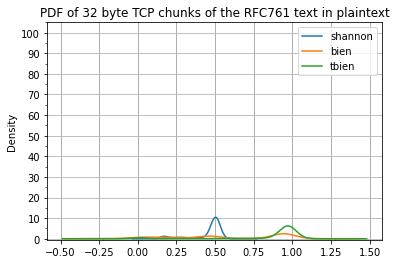

In [161]:
# Plot 1

title = 'PDF of {} byte {} chunks of the {} text in {}'.format(bytesize, proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='density',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,110,10)
yminortick = arange(0,110,5)
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/{}{}bytes{}{}density.png'.format(proto, bytesize, encoding, text), transparent=False)


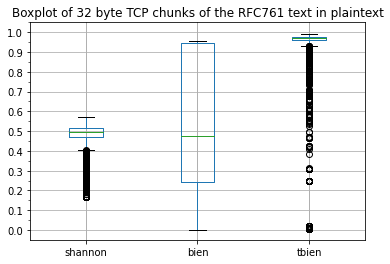

In [162]:
# Plot 2

title = 'Boxplot of {} byte {} chunks of the {} text in {}'.format(bytesize, proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='box',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,1.1,0.1)
yminortick = arange(0,1.1,0.05)
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/{}{}bytes{}{}box.png'.format(proto, bytesize, encoding, text), transparent=False)

In [163]:
# Table of data

df = df.describe()
print(df)

       srcport  dstport  payload_size      shannon          bien        tbien
count   2283.0   2283.0        2283.0  2283.000000  2.283000e+03  2283.000000
mean   31040.0   8088.0          32.0     0.456601  5.904582e-01     0.881115
std        0.0      0.0           0.0     0.103457  3.584089e-01     0.248070
min    31040.0   8088.0          32.0     0.166667  2.526177e-76     0.003925
25%    31040.0   8088.0          32.0     0.470086  2.428918e-01     0.959074
50%    31040.0   8088.0          32.0     0.496094  4.754281e-01     0.971618
75%    31040.0   8088.0          32.0     0.514539  9.480536e-01     0.977463
max    31040.0   8088.0          32.0     0.571311  9.534798e-01     0.988840


In [164]:
# Exporting new data

filename = 'Outputs/RFC761/{}{}bytes{}{}data.csv'.format(proto, bytesize, encoding, text)
df.to_csv(filename,',')